<a href="https://colab.research.google.com/github/rodrigopbbr/aprendizado_de_maquina/blob/main/dt_numerico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# biblioteca para manipulação de dados
import pandas as pd
# biblioteca para operações matemáticas
import numpy as np
# biblioteca para operações aleatórias
import random
# biblioteca para separação dos dados em treinamento e teste
from sklearn.model_selection import train_test_split
# biblioteca para carregar arquivos (e.g. csv)
from google.colab import files
# biblioteca para executar o DT
from sklearn.tree import DecisionTreeClassifier
# biblioteca para rodar a validação cruzada
from sklearn.model_selection import cross_val_score
#biblioteca de gráfico
import matplotlib.pyplot as plt
# bilbioteca para plotar a árvore
from sklearn.tree import plot_tree

In [ ]:
### você pode usar o código abaixo para carregar qualquer conjunto de dados
### para testar, não esqueça de descomentar a linha abaixo (remover o #)
### para praticar, faça upload do conjunto de dados "iris.csv" 
###    compartilhado pelo professor
files.upload()

Saving biodiversity-br.csv to biodiversity-br.csv


{'biodiversity-br.csv': b'"alt","temp2m","temp2mrange","humidity","precip","atm","wind","m.fapar","classe"\n0.361674110727435,0.719383617193836,0.719383617193836,0.614403401541323,0.594679186228482,0.97962962962963,0.192117942355962,0.665940006975933,"0"\n0.0670426027821496,0.916463909164639,0.916463909164639,0.579856497475419,0.516431924882629,0.994444444444444,0.170624044314936,0.365190094175096,"0"\n0.0398638259297992,0.856447688564477,0.856447688564477,0.818495880946054,0.624413145539906,1,0.123337468624679,0.798657132891524,"0"\n0.0648889136988004,0.821573398215734,0.821573398215734,0.872973691203827,0.632237871674491,1,0.173509131300309,0.999389605859784,"0"\n0.0256805620993904,0.788321167883211,0.788321167883211,1,0.871674491392801,1,0.283286691093736,0.896407394489013,"0"\n0.00740047305406615,0.847526358475263,0.847526358475263,0.855700239170874,0.818466353677621,1,0.1312426069646,0.793861178932682,"0"\n0.0267367694238013,0.845093268450933,0.845093268450933,0.893170342811586,0.

In [ ]:
# carregando o conjunto de dados iris (https://pt.wikipedia.org/wiki/Conjunto_de_dados_flor_Iris)
dataset = pd.read_csv('biodiversity-br.csv')
#dataset = pd.read_csv('biodiversity-br.csv')
# visualizando parte dos dados
dataset

,alt,temp2m,temp2mrange,humidity,precip,atm,wind,m.fapar,classe
0,0.361674,0.719384,0.719384,0.614403,0.594679,0.979630,0.192118,0.665940,0
1,0.067043,0.916464,0.916464,0.579856,0.516432,0.994444,0.170624,0.365190,0
2,0.039864,0.856448,0.856448,0.818496,0.624413,1.000000,0.123337,0.798657,0
3,0.064889,0.821573,0.821573,0.872974,0.632238,1.000000,0.173509,0.999390,0
4,0.025681,0.788321,0.788321,1.000000,0.871674,1.000000,0.283287,0.896407,0
...,...,...,...,...,...,...,...,...,...
860,0.118726,0.142741,0.142741,0.707414,0.397496,0.112963,0.250426,0.623997,0
861,0.014968,0.197891,0.197891,0.718044,0.369327,0.112963,0.252041,0.455267,1
862,0.129396,0.142741,0.142741,0.680308,0.367762,0.061111,0.242492,0.627834,0
863,0.000000,0.213301,0.213301,0.712463,0.350548,0.061111,0.240703,0.397279,0


In [ ]:
# separando o rótulo Species (Aprendizado de Máquina Supervisionado) dos demais atributos: y
y = dataset['classe']
dataset = dataset.drop(['classe'], axis = 1)

In [ ]:
# dividindo o conjunto de dados em treinamento e teste
# test_size informa qual o percentual de dados que vamos usar no teste
# neste exemplo estamos usando 10% (0.1)
X_train,X_test,y_train,y_test = train_test_split(dataset, y, test_size=0.1)

In [ ]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)

scores = cross_val_score(clf, X_train, y_train, cv=10)
np.mean(scores)

0.6041458541458542

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
# gerando a matriz de confusão
# um resultado perfeito acontece quando todos os valores estão na linha diagonal
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,N,R,All
True,,,
N,10,3,13
R,6,1,7
All,16,4,20


In [ ]:
# acurácia
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print(f"Acurácia: {accuracy_score(y_test, y_pred)}")
print(f"Precisão: {precision_score(y_test, y_pred, average='macro')}")
print(f"Revocação: {recall_score(y_test, y_pred, average='macro')}")
print(f"f1-measure: {f1_score(y_test, y_pred, average='macro')}")

Acurácia: 0.55
Precisão: 0.4375
Revocação: 0.4560439560439561
f1-measure: 0.4357366771159875


[Text(493.6153846153846, 978.48, 'X[5] <= 0.39\nentropy = 1.0\nsamples = 778\nvalue = [398, 380]'),
 Text(214.61538461538458, 761.0400000000001, 'X[3] <= 0.71\nentropy = 0.6\nsamples = 89\nvalue = [76, 13]'),
 Text(128.76923076923077, 543.6, 'X[6] <= 0.087\nentropy = 0.187\nsamples = 35\nvalue = [34, 1]'),
 Text(85.84615384615384, 326.1600000000001, 'X[6] <= 0.082\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(42.92307692307692, 108.72000000000003, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(128.76923076923077, 108.72000000000003, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(171.69230769230768, 326.1600000000001, 'entropy = 0.0\nsamples = 32\nvalue = [32, 0]'),
 Text(300.46153846153845, 543.6, 'X[6] <= 0.042\nentropy = 0.764\nsamples = 54\nvalue = [42, 12]'),
 Text(257.53846153846155, 326.1600000000001, 'entropy = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(343.38461538461536, 326.1600000000001, 'X[0] <= 0.015\nentropy = 0.837\nsamples = 45\nvalue = [33, 12]'),
 

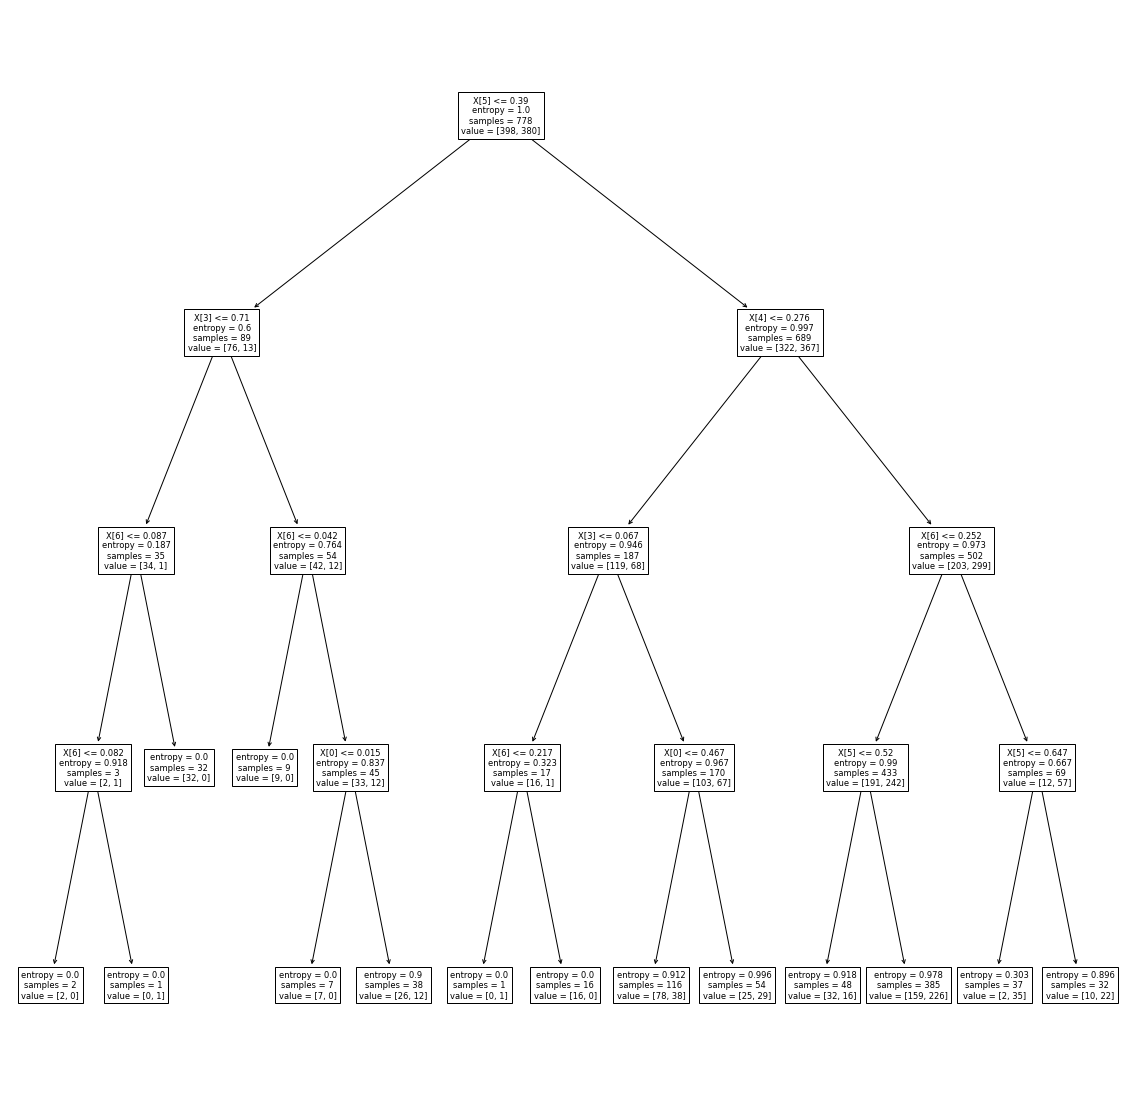

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_tree(clf, ax=ax)